In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('pca_2d_data.csv')
data.head()

,f1,f2
0,2.038772,1.102760
1,0.869536,0.238030
2,1.795888,1.020364
3,0.103510,-0.513661
4,1.479554,0.750702


<AxesSubplot:xlabel='f1', ylabel='f2'>

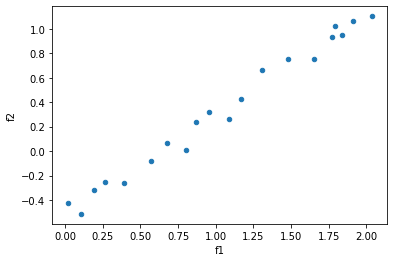

In [3]:
data.plot(x='f1', y='f2', kind='scatter')

### from scratch

[2.09718701 0.00807615]


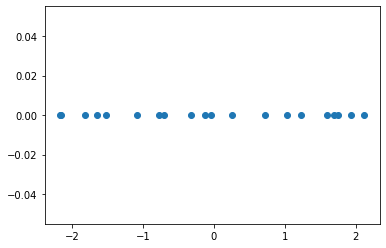

In [4]:
## Implement PCA!!
# Step 1: Column standardization
x_data = data['f1'].values
y_data = data['f2'].values

mean_x = np.mean(x_data)
mean_y = np.mean(y_data)

std_x = np.std(x_data)
std_y = np.std(y_data)

x_data_cs = (x_data - mean_x) / std_x
y_data_cs = (y_data - mean_y) / std_y

X_st = np.zeros((len(x_data), 2))
X_st[:, 0] = x_data_cs
X_st[:, 1] = y_data_cs

# Step 2: Eigenvalue decomposition
cov_X_st = np.matmul(X_st.T, X_st) / (len(x_data)-1)
eigenvalues, eigenvectors = np.linalg.eig(cov_X_st)

print(eigenvalues)

# Step 3: Reduce the dimension! Choose the eigenvector corresponding to the largest eigenvalue
X_prime = eigenvectors[:, 0].dot(X_st.T)
X_prime_reduced = X_prime

# Step 4: Visualize
plt.figure()
plt.scatter(X_prime_reduced, np.zeros((len(x_data),)))
plt.show()

### Using sklearn for help

[2.09718701 0.00807615]


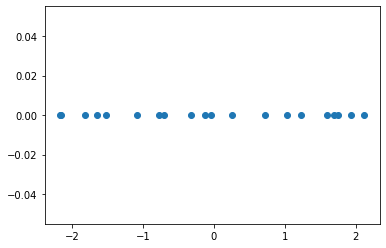

In [5]:
from sklearn.preprocessing import StandardScaler

data_sc = StandardScaler().fit_transform(data)
cov = np.cov(data_sc.T)
eigenvalues, eigenvectors = np.linalg.eig(cov)

print(eigenvalues)

X_prime_reduced = eigenvectors[:, 0].dot(data_sc.T)

# Step 4: Visualize
plt.figure()
plt.scatter(X_prime_reduced, np.zeros((len(data_sc),)))
plt.show()

In [6]:
total_info = 2.09718701 + 0.00807615

In [7]:
pc1 = 2.09718701 / total_info
pc1

0.9961638287538362

### Sklearn PCA

[2.09718701]


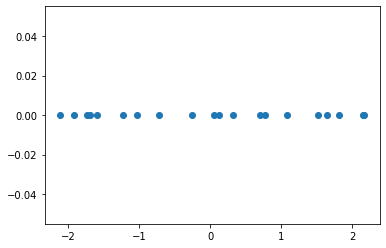

In [14]:
from sklearn import decomposition
from sklearn import datasets

pca = decomposition.PCA(n_components=1)

X_p = pca.fit_transform(data_sc)
print(pca.explained_variance_)

plt.figure()
plt.scatter(X_p[::-1, 0], np.zeros((len(data_sc),)))
plt.show()

In [15]:
pca.components_

array([[-0.70710678, -0.70710678]])

In [16]:
pca.explained_variance_

array([2.09718701])

In [17]:
sum(pca.explained_variance_ratio_)

0.9961638305134559

In [9]:
pca.components_

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])